# INFO 3401 – Class 22: Spatial data fundamentals

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
This lecture will introduce forecasting, one of the most common data analysis tasks when working with time series data.

* Using shapely and fundamentals of geometric objects
* Reading and writing spatial data
* Filtering spatial data in GeoPandas
* Visualizing spatial data and using different projections

## Background

This module will explore how to acquire, analyze, and visualize spatial data. I have adapted this content from the excellent course [Auotmating GIS processes](https://automating-gis-processes.github.io/site/index.html) course by [Vuokko Heikinheimo](https://researchportal.helsinki.fi/en/persons/vuokko-vilhelmiina-heikinheimo) and [Henrikki Tenkanen](https://www.ucl.ac.uk/geospatial-analytics/people/henrikki-tenkanen).

### Install new libraries

Analyzing spatial data requires a few libraries that aren't installed with Anaconda by default. The ecosystem of spatial data libraries within Python is infamously decentralized and there are a dozen or more dependencies that need to be installed. Make sure your notebooks are saved and [close them down](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html#shut-down-the-jupyter-notebook-app).

**At the terminal**, install [geopandas](https://geopandas.org/index.html) and [geoplot](https://residentmario.github.io/geoplot/index.html):

`conda install geopandas geoplot -c conda-forge`

Then do a `conda update --all` for good measure.

## Load libraries

Load our usual libraries.

In [2]:
# Data processing libraries
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

# Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

Import a few of our new libraries.

In [3]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

## Geometric objects

We are not going to be constructing map geometries by hand any more than we are going to make DataFrames cell-by-cell. However, it's still important to know more about the fundamental geometric objects used for making maps in Python. [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) is one library for represential spatial geometries of points, lines, and polygons (among other possible geometries).

* A `Point` is a single point in (usually two-dimensional) space: `(x,y)`
* A `LineString` is a sequence of at least two points that form a line: `[(x0,y0),(x1,y1)]`
* A `Polygon` is a sequence of at least three points that forms an enclosed area: `[(x0,x1),(x1,y1),(x2,y2)]`

After defining a geometry in some space, calling that object will return a visualization.

### Point
Make a `Point` at position (1,2) and display it.

In [7]:
point0.geom_type

NameError: name 'point0' is not defined

Print the object.

In [5]:
point0

NameError: name 'point0' is not defined

Confirm the type of geometry of the object.

In [ ]:
point0.geom_type

Access its coordinates as an attribute.

Make another `Point` at (4,2) and calculate the distance between the two points.

Make a third point at (-2,-2).

### LineString

Make a `LineString` of the three points you defined above. Display the `LineString`.

Note that the order of the points matters.

Confirm the type of geometry.

Access its coordinates. Note that the x-coordinates are in first array and the y-coordinates are in the second array.

Compute the length.

### Polygon

Confirm the geometry type.

The centroid is the center of the three points.

## Reading spatial data

There are many standards and file formats for storing and sharing spatial data. Shapefiles are one of the most common standards and the default used by geopandas's [`read_file`](https://geopandas.org/reference/geopandas.read_file.html#geopandas.read_file) function.

* The U.S. Census bureau publishes official national-level spatial data files for a variety of boundary types: [TIGER/Line Shapefiles](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html) and [Cartographic Boundary Files](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html)
* Eric Celeste's has some of the Census Bureau's shapefiles converted to KML and GeoJSON: [GeoJSON and KML Data for the United States](https://eric.clst.org/tech/usgeojson/)
* Many states, counties, and cities publish detailed GIS data about their jurisdictions:  
  * [Official State of Colorado GIS data](https://demography.dola.colorado.gov/gis/gis-data/#gis-data); [ColoradoView](https://www.coloradoview.org/colorado-gis/)
  * [Offical Boulder County GIS data](https://opendata-bouldercounty.hub.arcgis.com/)
  * [Offical City of Boulder GIS data](https://bouldercolorado.gov/open-data/tag/gis)

The resulting data looks a lot like a normal pandas DataFrame but there's always a "geometry" column that contains a `Polygon` or analogous (*e.g.*, `MultiPolygon`) geometry. Sometimes there's lots of associated metadata about the geometry like names, identifiers, abbreviations, sizes, populations, *etc.* associated with the geometry, other times it's just a name and the geometry.

International and national datasets are often offered at different resolutions, we'll talk more about these trade-offs when we get to visualization.

### Shapefiles
[Shapefiles](https://en.wikipedia.org/wiki/Shapefile) are actually a collection of files generally shared as ZIP files. You cannot read in the ZIP file directly and will need to unzip it to a sub-directory. I have downloaded the 2019 State layer from the [U.S. Census TIGER/Line](https://www.census.gov/cgi-bin/geo/shapefiles/index.php) shapefile and unzipped it to a new sub-directory "us_states". I only read the `.shp` filename which automatically grabs the other data in the directory as well.

In [9]:
# Read in and assign data to a variable
us_ststes_gdf = gpd.read_file('tl_2019_us_state/tl_2019_us_state.shp')

# Inspect
us_ststes_gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


### GeoJSON

Working with ZIP files and sub-directories can be a pain, so standards like [GeoJSON]() provide an alternative way for storing and sharing data. Make sure to invoke the "driver='GeoJSON'" parameter for `read_file`. Like pandas's `read_csv`, GeoPandas's `read_file` can read directly from the web.

In [ ]:
# Get the data directly from: https://eric.clst.org/tech/usgeojson/
us_state_geo_json_gpd = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json')

Here's a file with the shapes of all the countries in the world.

## Filtering spatial data in GeoPandas

Inspect the `us_states_shp_gdf` file we read in above.

Summarize the different columns.

Find the row for Colorado.

There are different attributes on a GeoSeries. Two of the most relevant are `area` and `centroid`

* `.area` - computes the area of each row's Polygon
* `.centroid` - returns the centroid of each row's Polygon

## Projections

The warnings (red boxes) we got by accessing the attributes above reference a need to use a "CRS". 

What's a CRS? CRS refers to a "coordinate reference system" and is a way of defining map projections. 

What's a [map projection](https://en.wikipedia.org/wiki/Map_projection)? Trying to represent a 3D surface in 2D requires some compromises in accuracy in some kind of way and has been an area of research within geography for centuries. 

[xkcd comic 977](https://xkcd.com/977/) summarizes some of the more common projections. [S02E16 of *The West Wing*](https://www.youtube.com/watch?v=OH1bZ0F3zVU) has a nice scene about map projections as well.

What kinds of map projections are available? A *lot*—again this has been an active area of research within geography for centuries with lots of strongly-held preferences and critiques.

* [Proj.org](https://proj.org/operations/projections/)
* [SpatialReference.org](https://spatialreference.org/)
* [Choosing the Right Map Projection](https://source.opennews.org/articles/choosing-right-map-projection/)
* [List of map projections](https://en.wikipedia.org/wiki/List_of_map_projections)
* [Compare Map Projections](https://map-projections.net/)

Inspect the current CRS for any of the files we have read in above using the `.crs` attribute on the GeoDataFrame.

In [12]:
us_ststes_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
countries_geojson_gpd.crs

NameError: name 'countries_geojson_gpd' is not defined

### EPSG IDs
The most commonly used (but not necessarily the best) projection is the [World Geodetic System](https://en.wikipedia.org/wiki/World_Geodetic_System), also known as WGS84, also known as EPSG:4326. The popular (but terrible) [Web Mercator projection](https://en.wikipedia.org/wiki/Web_Mercator_projection) (found in Google Maps, *etc*.) is stored as EPSG:3857.

We can convert between projections using the `.to_crs()` method on a GeoDataFrame.

<AxesSubplot:>

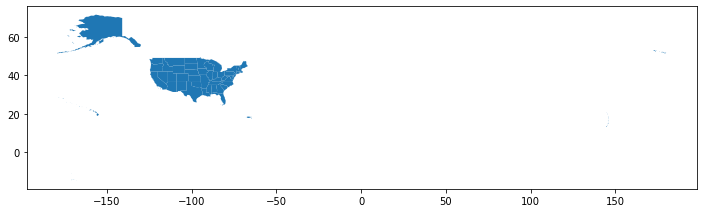

In [14]:
us_ststes_gdf.plot(figsize=(12,6))

<AxesSubplot:>

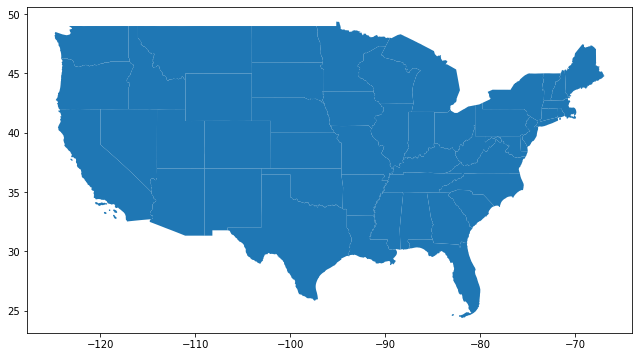

In [16]:
lower48=us_ststes_gdf[~us_ststes_gdf['STUSPS'].isin(['AK','HI','GU','MP','VI','PR','AS'])]
lower48.plot(figsize=(12,6))

When we change the projection, the definitions of the polygons change, which can also drastically change other calculated attributes like area, centroids, and distance.

In [18]:
lower48.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
lower48_epsg4326 = lower48.to_crs(epsg='4326')

<AxesSubplot:>

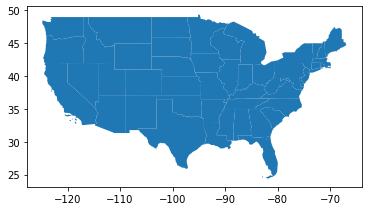

In [21]:
lower48_epsg4326.plot()

<AxesSubplot:>

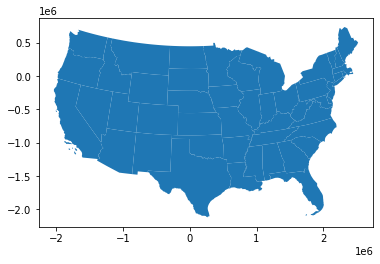

In [22]:
lower48_epsg2163 = lower48.to_crs(epsg='2163')
lower48_epsg2163.plot()

<AxesSubplot:>

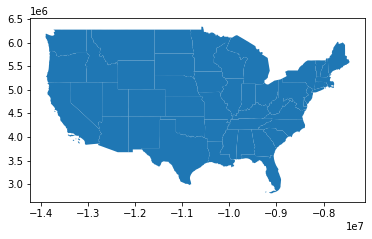

In [23]:
lower48_epsg3857 = lower48.to_crs(epsg='3857')
lower48_epsg3857.plot()

<AxesSubplot:>

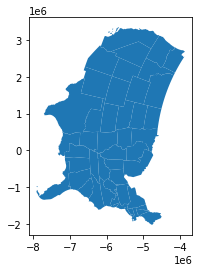

In [24]:
lower48_epsg3995 = lower48.to_crs(epsg='3995')
lower48_epsg3995.plot()

In [25]:
lower48_epsg2163['geometry']

0     POLYGON ((1561571.961 -483477.971, 1561619.813...
1     MULTIPOLYGON (((1300534.538 -1450505.843, 1300...
2     POLYGON ((742564.486 -445238.183, 743359.700 -...
3     POLYGON ((245479.802 186204.457, 245483.060 18...
4     POLYGON ((1914704.978 -379436.546, 1914710.426...
5     MULTIPOLYGON (((2284754.210 36016.088, 2284698...
6     POLYGON ((-1320390.644 120880.552, -1320386.43...
7     POLYGON ((2174741.054 220735.669, 2174745.020 ...
8     POLYGON ((1570933.077 -826582.735, 1570940.814...
9     POLYGON ((2077303.749 265450.633, 2077297.944 ...
10    POLYGON ((2153209.083 -17580.644, 2153207.748 ...
11    POLYGON ((2051669.129 -330166.879, 2051656.712...
12    POLYGON ((-534160.606 -870239.336, -534071.660...
13    MULTIPOLYGON (((-1976210.177 -98944.190, -1976...
14    POLYGON ((2057259.261 -176271.933, 2057234.614...
15    POLYGON ((552058.173 95955.669, 552081.771 960...
16    POLYGON ((-1831536.295 364072.673, -1831066.61...
17    POLYGON ((-334822.281 -325088.607, -334816

### PROJ strings
In addition to EPSG standards, projections can be defined by standardized "[PROJ](https://proj.org/usage/quickstart.html)" strings. These are available within [SpatialReference.org](https://spatialreference.org/). We'll need to import a library called [pyproj](https://pyproj4.github.io/pyproj/stable/) that (hopefully) should've been installed when you installed GeoPandas.

In [ ]:
from pyproj import CRS

First, let's take a global map like `countries_geojson_gpd` and inspect its default projection using the `.crs` attribute.

Now let's plot it.

Use the `CRS` function to retrieve the Web Mercator projection by EPSG ID.

This `web_mercator` is *not* a GeoPandas DataFrame or Series, but a definition of a projection. Inspect the `web_mercator` object.

Use the `.to_crs` method with the `web_mercator` on the `countries_geojson_gpd` GeoDataFrame to convert it and plot it.

Projections can be defined by more that EPSG IDs like the PROJ strings. Retrieve the PROJ string for the [Eckert IV](https://en.wikipedia.org/wiki/Eckert_IV_projection) projection from SpatialReference.org: https://spatialreference.org/ref/esri/54012/ and click on "Proj4"

We could also use an [orthographic projection](https://en.wikipedia.org/wiki/Orthographic_map_projection) approximately centered over Colorado. Here we can begin to customize what's in the PROJ string to see how it changes the map projection. More details here: http://www.statsmapsnpix.com/2019/09/globe-projections-and-insets-in-qgis.html

We could also construct a CRS projection from other attributes. (Adapted from [Automating GIS Processes: "Calculating Distances"](https://automating-gis-processes.github.io/site/notebooks/L2/calculating-distances.html)

* `proj='aeqd'` refers to projection specifier that we determine to be Azimuthal Equidistant (‘aeqd’)
* `ellps='WGS84'` refers to the reference ellipsoid that is a mathematically modelled (based on measurements) surface that approximates the true shape of the world. World Geodetic System (WGS) was established in 1984, hence the name.
* `datum='WGS84'` refers to the Geodetic datum that is a coordinate system constituted with a set of reference points that can be used to locate places on Earth.
* `lat_0` is the latitude coordinate of the center point in the projection
* `lon_0` is the longitude coordinate of the center point in the projection

Figure out the center of Colorado specifically.

Now make an [Azimuthal Equidistant](https://en.wikipedia.org/wiki/Azimuthal_equidistant_projection) projection centered on Colorado.

Try the `aeqd` projection on the `lower48` GeoDataFrame.

## Visualizing data: choropleths

Everything we've done to date has been dealing with the challenges of defining spatial data and how to represent a 3D surface on a 2D screen. Now let's work with some data. The most common kind of visualization when working with spatial data is a choropleth: color individual units by some other data value. We'll work with state-level U.S. Presidential election results since 1976.

Read in the "1976-2016-president.csv" file via pandas.

Filter the data to only Democrats and Republicans for the sake of simplicity.

Calculate the "candidatevotes" as a percentage of the "totalvotes".

Pivot the data so we get Democrat and Republican candidate vote percentages by state and year.

Pull out the 2016 results.

Join `president_2016_df` with the `lower48` states.

Project to a nice-looking equal area map (EPSG 2146).

Visualize the "Republican" column with a nice "bwr" [colormap](https://matplotlib.org/tutorials/colors/colormaps.html).